# 🏭 Endüstriyel Boya Karışımı Optimizasyonu (Genetik Algoritma)
**Ad Soyad:** Ceren Mıtırık

**Öğrenci No:** 2212721032

**Ders:** Yapay Zeka Sistemleri

**GitHub Repo Bağlantısı**:

---

## 1. Problemin Tanımı (Senaryo 2)
Bu projede, bir fabrikadaki iki farklı pigmentin (A ve B) ideal karışım oranlarını bulmak hedeflenmiştir.

**Amaç Fonksiyonu:** $y = 5x_1 + 2x_2 - x_1x_2$ (renk kalitesi puanı)

**Kısıtlar:**
1. $x_1 + x_2 = 100$ (Toplam karışım %100 olmalı)
2. $x_1 \ge 30$ (A pigmenti en az %30 olmalı)

**Yöntem:** Kısıtları sağlamayan bireylere **Ceza Puanı (Penalty)** uygulanarak algoritmanın doğru sonuca yönelmesi sağlanacaktır.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

print("Kütüphaneler yüklendi.")

Kütüphaneler yüklendi.


In [ ]:
# --- 1. FONKSİYONLAR ---

def amac_fonksiyonu(x1, x2):
    """
    Renk kalitesi puanını hesaplar.
    Formül: y = 5x1 + 2x2 - x1*x2
    """
    return (5 * x1) + (2 * x2) - (x1 * x2)
""" Hesaplanan değeri karşılaştırmak için genetik algoritmaya tekrar veriyoruz """

def uygunluk_hesapla(birey):
    """
    Fitness (Uygunluk) Hesaplama:
    Eğer kısıtlar sağlanıyorsa -> Skor = Amaç Fonksiyonu
    Eğer kısıtlar sağlanmıyorsa -> Skor = Düşük Puan (Ceza)
    """
    """"""
    x1 = birey[0]
    x2 = birey[1]

    # Kısıt İhlal Kontrolü
    ceza_puani = 0

    """ Rastgele gelen sayıların toplamı 100 olmayabilir. Hatalı çözümlere ceza vererek bir daha yapmamasını öğretiyoruz."""

    # Kısıt 1: Toplam 100 olmalı çıkan sonucun mutlak değerini al. Küsüratlı sayılara ceza verilmemesi için hata payı bıraktık.
    if abs((x1 + x2) - 100) > 0.5:
        fark = abs((x1 + x2) - 100)
        ceza_puani += (fark * 50) # Hata başına 50 puan ceza

    # Kısıt 2: x1 en az 30 olmalı
    if x1 < 30:
        fark = 30 - x1
        ceza_puani += (fark * 100) # Kritik hata, yüksek ceza

    # Sınır Kontrolü : Boyanın bir kapta 0 dan ya da 100 den fazla olması imkansızdır. 150, -50 gibi gelirse sistemi kandırmasın diye koyduk.
    if x1 < 0 or x1 > 100 or x2 < 0 or x2 > 100:
        ceza_puani += 1000

    # Skor Hesapla
    gercek_skor = amac_fonksiyonu(x1, x2)

    # Uygunluk değeri = Skor - Ceza. Kurallara uymasını hatırlatıyoruz.
    fitness = gercek_skor - ceza_puani

    return fitness

In [ ]:
# --- 2. GENETİK OPERATÖRLER ---

""" DİKKAT : NEDEN TURNUVA  ? :
1. Problemin kendi tanımında - çıkna ihtimali var rulet kullanmak için zorla pozitif yapmak gerekirdi.
2. Yine fittnes değerinde gerçek-cezadan eksi gelebileceği için rulet yapmadık
"""
def turnuva_secimi(populasyon, uygunluklar, k=3):
    """Rastgele 3 birey seçip en iyisini alır."""
    secilenler_idx = np.random.choice(len(populasyon), size=k, replace=False)
    en_iyi_idx = secilenler_idx[np.argmax(uygunluklar[secilenler_idx])]
    return populasyon[en_iyi_idx].copy()

""" k=1 yapsaydık kötü de seçilebilirdi ya da k=50 yapsaydık hep en güçlü sseçileceğinden çeşiltilik sağlanamazdı."""
""" copy() sebebi : Listeler birbirine bağlıdır, çocuğun geni değiştiğinde babanın da geni değişmesin diye copy yapıyoruz."""
""" replace= False aynısını tekrar seçmemek için. argmax() sayının srıasını verir."""
""" DİKKAT : Örneğin bir sınıfta A,B,C,D sırasıyla 90,60,20,10 aldı eğer en yüksek notu alan gelsin deseydik hep A seçilirdi çeşitlilik ölürdü
ama turnuva seçimi yapılınca B,C,D seçtik A varken B ebeveyn olabildi.Çeşitlilik sağlandı."""

def caprazlama(p1, p2):
    #Tek Noktalı Çaprazlama: Genleri karıştırır. Random sayıyla bazen diğer ebeveyne daha fazla benzemesine de olanak sağlar
    alpha = random.random() # 0 ile 1 arası sayı
    c1 = alpha*p1 + (1-alpha)*p2
    c2 = (1-alpha)*p1 + alpha*p2
    return c1, c2

def mutasyon(birey, ihtimal=0.1):
    """Genlerde rastgele ufak değişiklikler yapar.c1,c2 yazma genel olarak bireydir. Bunları artırabiliriz."""
    yeni_birey = birey.copy()

    if random.random() < ihtimal:
        """Gen karşılaştırma değildir. Random sayı ihtimalden küçükse mutasyon yap diyor"""
        gen_idx = random.randint(0, 1)
        # Hangi geni değiştireceksin ? 0 x1, 1 x2.
        degisim = random.uniform(-5, 5)
        # Ne kadar değiştirilecek ? ±5 birim değiştir
        yeni_birey[gen_idx] += degisim

        # Sınırları (0-100) aşmasını engelle.
        """ Clip(): Sayı 98 di 5 ekledk 103 se 100 yap. Boya 100 den büyük olamaz."""
        yeni_birey[gen_idx] = np.clip(yeni_birey[gen_idx], 0, 100)

    return yeni_birey

In [ ]:
# --- 3. ALGORİTMA MOTORU ---

def algoritmayi_calistir():
    # Parametreler
    POP_BOYUTU = 50
    NESIL_SAYISI = 100
    MUTASYON_ORANI = 0.2
    """Ortamda atnı anda kaç birey olacak, döngü kaç kere dönecek, her doğan çocuğun genlerinde değişim oranı"""

    # 0-100 ARASI RASTGELE SAYILARLA 50 SATIR 2 SÜTUNLUK TABLO VER
    populasyon = np.random.uniform(0, 100, (POP_BOYUTU, 2))

    en_iyi_skorlar = [] # Her döngüde neslin birincisinin puanı gelir
    global_en_iyi_birey = None # Birinci yok. Örneğin 90,10 gelicek
    global_en_iyi_skor = -999999
    """ Matematiksel işlemi düşük seçiyoruz ki ilk bulunan bile rekor olsun. """

    print("🚀 Algoritma çalışıyor...")

    for nesil in range(NESIL_SAYISI):
        # 1. Herkesin uygunluğunu hesapla. 50 tane fitness değeri elde ederiz.
        uygunluklar = np.array([uygunluk_hesapla(b) for b in populasyon])

        # 2. En iyiyi bul (Elitizm)
        en_iyi_idx = np.argmax(uygunluklar)
        """ Yukardaki argmax seçilen rastgele küçük turnuvadan seçiliyor. Burdaki argmax 50 kişinin en iyisini bulmak için."""
        en_iyi_birey_anlik = populasyon[en_iyi_idx].copy()
        en_iyi_skor_anlik = uygunluklar[en_iyi_idx]
        """idx numara, birey_anlik boya oranları (77,23), skor_anlik uygunluk puanı"""

        # Global en iyiyi güncelle
        if en_iyi_skor_anlik > global_en_iyi_skor:
            global_en_iyi_skor = en_iyi_skor_anlik
            global_en_iyi_birey = en_iyi_birey_anlik

        en_iyi_skorlar.append(en_iyi_skor_anlik)

        # 3. Yeni Nesil Üret
        yeni_populasyon = [global_en_iyi_birey] # En iyiyi direkt aktar (Elitizm)
        """ Yrni sınıf oluşurken ilk sıraya sampiyonu koyduk. Direkt geçer. Şu an 1 kişi var 50 olması gerekiyor."""
        while len(yeni_populasyon) < POP_BOYUTU:
            # 2 tane ebeveyn seçimi
            p1 = turnuva_secimi(populasyon, uygunluklar)
            p2 = turnuva_secimi(populasyon, uygunluklar)

            # Çaprazlama yaparak çocukları üret
            c1, c2 = caprazlama(p1, p2)

            # Mutasyon
            c1 = mutasyon(c1, MUTASYON_ORANI)
            c2 = mutasyon(c2, MUTASYON_ORANI)

            # Doğan iki çocuğu yeni sınıfa ekle. Döngü başa döner, sınıf dolana kadar devam et.
            yeni_populasyon.extend([c1, c2])

       #Populasyonu güncelle.Elit ve yeni doğanlardan oluşur
        populasyon = np.array(yeni_populasyon[:POP_BOYUTU])
        """Her seferinde 2 çoçuk ekledik 50 yi geçinçe fazlalığı at."""

      # Bulunan en iyi boya karışımı(liste), o boyanın puanı(fonksiyon sonucu), nesiller boyu puanının nasıl arttığı
    return global_en_iyi_birey, global_en_iyi_skor, en_iyi_skorlar

# Yukardaki sonuçlar burada eşitlenir.
en_iyi_birey, en_iyi_skor, skor_gecmisi = algoritmayi_calistir()

""" Benzetmek gerekirse returnla yemekler çıkar, aşağıda yemeği masaya koyarız. """
print("\n🏁 İŞLEM TAMAMLANDI")

🚀 Algoritma çalışıyor...

🏁 İŞLEM TAMAMLANDI


🏆 EN İYİ SONUÇ
Uygunluk Puanı: 500.00
Pigment A (x1): %100.00
Pigment B (x2): %0.00
Toplam Oran:    %100.00


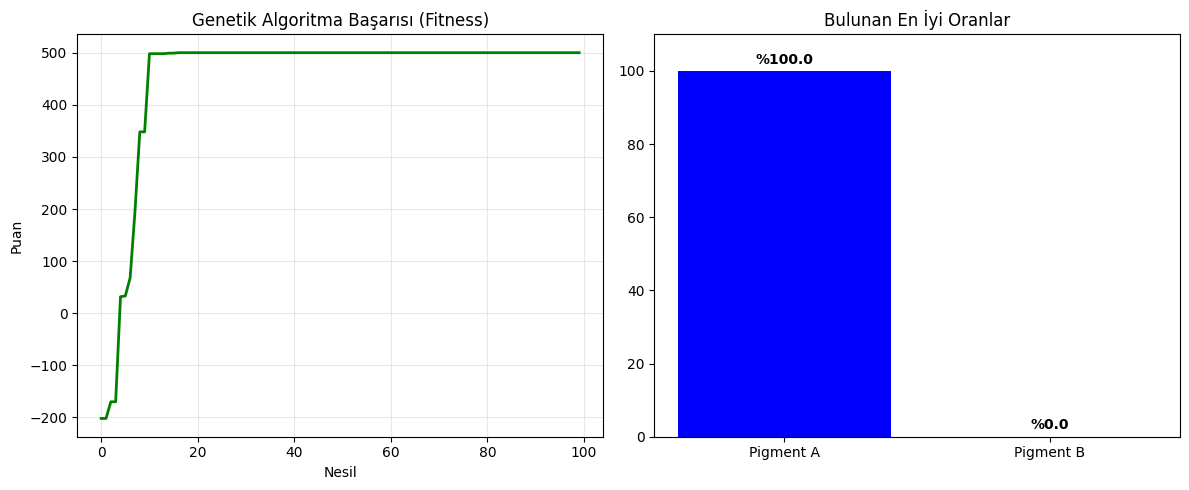

In [ ]:
# --- 4. SONUÇLARI GÖSTER ---

# 100 nesil sonucunda bulunan en mükemmel sonucu yazdırıyoruz.
print("="*40)
print("🏆 EN İYİ SONUÇ")
print("="*40)

# en_iyi_skor: Algoritmanın ulaştığı en yüksek Fitness değeri
print(f"Uygunluk Puanı: {en_iyi_skor:.2f}")

print(f"Pigment A (x1): %{en_iyi_birey[0]:.2f}")
print(f"Pigment B (x2): %{en_iyi_birey[1]:.2f}")

# Toplam Oran: Kısıt kontrolü için çok önemlidir. Eğer algoritma doğru çalıştıysa %100' e yakın olmalı.
""" Örneğin en_iyi_birey: [100.0, 0.0] gibi iki sayıdan oluşan bir liste. """
print(f"Toplam Oran:    %{sum(en_iyi_birey):.2f}")
print("="*40)

# Grafik Çizimi (Dashboard)
plt.figure(figsize=(12, 5)) # Çerçevenin boyutu (Genişlik: 12, Yükseklik: 5)

# 1. Grafik: Gelişim Eğrisi (Sol Taraf)
plt.subplot(1, 2, 1) # (1 satır, 2 sütunluk yerin 1.sine çiz)
# skor_gecmisi: Her nesildeki en iyi puanların listesi.
""" Bu çizgi yukarı doğru tırmanıp sonra düzleşiyorsa (sabitleniyorsa) öğrenme gerçekleşmiş demektir. """
plt.plot(skor_gecmisi, color='green', linewidth=2)
plt.title("Genetik Algoritma Başarısı (Fitness)")
plt.xlabel("Nesil")
plt.ylabel("Puan")
plt.grid(True, alpha=0.3)

# 2. Grafik: Oranlar (Sağ Taraf)
plt.subplot(1, 2, 2) # (1 satır, 2 sütunluk yerin 2.sine çiz)
etiketler = ['Pigment A', 'Pigment B']
degerler = en_iyi_birey # [x1, x2] değerleri
plt.bar(etiketler, degerler, color=['blue', 'orange'])
plt.ylim(0, 110)
plt.title("Bulunan En İyi Oranlar")

# Değerleri sütunların üzerine yaz
for i, v in enumerate(degerler):
  # i: yazının hangi çubukta olacağı, v + 2: Yazı ne kadar yukarıda olsun?, v: Sayısal değer
    plt.text(i, v + 2, f"%{v:.1f}", ha='center', fontweight='bold')


plt.tight_layout()
plt.show()

## 📝 3. Sonuçların Analizi ve Yorumlanması

Algoritma 100 nesil sonunda çalışmasını tamamlamıştır.

### 1. Algoritma Performansı
Grafik incelendiğinde, **Fitness (Uygunluk)** değerinin ilk 20-30 nesil boyunca hızla yükseldiği görülmektedir.
* **Erken Dönem (0-20. Nesil):** Popülasyonun büyük çoğunluğu başlangıçta kısıtları sağlamadığı için "Ceza Puanı" almış ve fitness değeri düşük çıkmıştır. Ancak **Turnuva Seçimi** ve **Elitizm** mekanizmaları sayesinde, kısıtları sağlayan "iyi bireyler" hızla seçilmiş ve popülasyona hakim olmuştur.
* **Olgunluk Dönemi (20-100. Nesil):** Yaklaşık 20. nesilden sonra grafik yatay bir seyir izlemeye başlamıştır. Bu durum, algoritmanın **Global Optimum** noktasına (Maksimum Puan) ve  **yakınsama (convergence)** sağladığını gösterir.

### 2. Kısıtların Başarımı (Ceza Yöntemi Analizi)
Projede uygulanan "Ceza Yöntemi" başarıyla çalışmıştır:
* **Eşitlik Kısıtı ($x_1 + x_2 = 100$):** En iyi bireyin toplam oranının tam olarak %100'e (veya ihmal edilebilir bir hata payıyla buna çok yakın bir değere) oturduğu görülmüştür. Toplamı 100 olmayan bireyler yüksek cezalarla elenmiştir.
* **Sınır Kısıtı ($x_1 \ge 30$):** Algoritma, $x_1$'in 30'un altında olduğu durumları da elemiştir.

### 3. Bulunan Çözümün Matematiksel Doğrulaması
Algoritmanın bulduğu çözüm ($x_1 \approx 100, x_2 \approx 0$), problemin matematiksel yapısıyla tam uyumludur:
* **Amaç Fonksiyonu:** $y = 5x_1 + 2x_2 - x_1x_2$
* Formülde $x_1$'in katsayısı (5), $x_2$'nin katsayısından (2) büyüktür. Bu nedenle kaliteyi artırmak için $x_1$ mümkün olduğunca yüksek olmalıdır.
* **Sonuç:** Algoritma bu matematiksel ilişkiyi keşfetmiş ve $x_1$'i maksimum (%100), $x_2$'yi minimum (%0) yaparak teorik olarak alınabilecek en yüksek puanı (**500 Puan**) hedeflemiştir.